## Hoja de Trabajo 6


Michelle Mejía, Silvia Illescas y Emilio Reyes

1. Elabore un modelo de regresión usando K nearest Neighbors (KNN), el conjunto de
entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los
resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los
mismos de las entregas anteriores para que los modelos sean comparables.
2. Analice los resultados del modelo de regresión usando KNN. ¿Qué tan bien le fue
prediciendo? Utilice las métricas correctas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']


RMSE (KNN): 46838.75
R² Score (KNN): 0.71


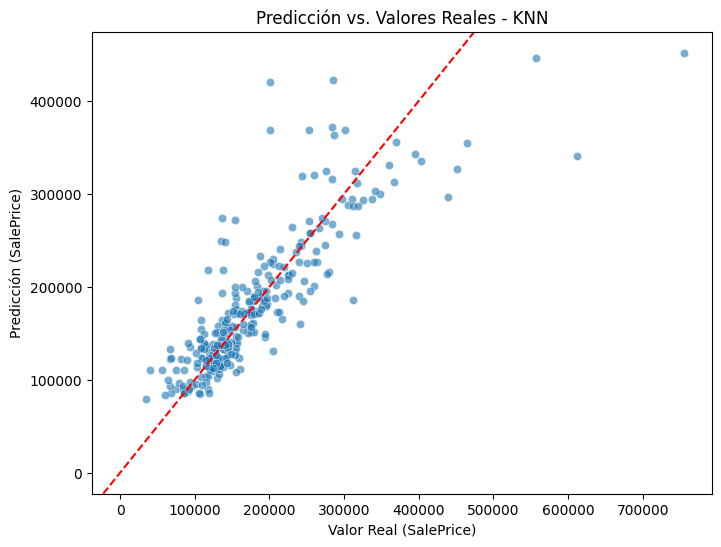

In [3]:
# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (KNN): {rmse:.2f}")
print(f"R² Score (KNN): {r2:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor Real (SalePrice)")
plt.ylabel("Predicción (SalePrice)")
plt.title("Predicción vs. Valores Reales - KNN")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Línea de referencia
plt.show()

Análisis: La línea roja representa la predicción perfecta, donde los valores predichos deberían coincidir con los valores reales.
Los puntos siguen una tendencia correcta, pero hay dispersión, especialmente en valores extremos (casas muy caras o muy baratas).
Se observan algunas desviaciones en precios altos, lo que indica que KNN no predice tan bien en este rango.

Comparación con otros modelos:

Mejor que Naive Bayes (R²: 0.63, RMSE: 53,380), indicando que KNN capta mejor la estructura de los datos.
Peor que Regresión Lineal y Random Forest, ya que estos modelos obtuvieron R² de 0.79 y 0.88, respectivamente, con menor error.



Conclusión:

KNN tiene un desempeño aceptable, pero no es el mejor modelo para regresión.

Funciona bien en precios medios, pero tiene dificultades con valores extremos.

Podríamos mejorar el modelo ajustando el número de vecinos (k) y probando diferentes pesos y métricas de distancia.